**Business Objective:**
1.	Need to get sentiment analysis of tweets gauge its impact and type
Architecture level analysis:
1.	Data transformation/Text processing using R/Python
2.	Need to get sentiments Analysis and Emotion mining with some charts like histogram, Density plot, Barplot, pie-plot etc.
3.	Deployment through R Shiny or Flask/ Streamlit


Text mining and classification of tweets involve several steps to process, analyze, and categorize the content of tweets. Here are the various steps involved:

Data Collection:
Gather a dataset of tweets that you want to analyze and classify. This could involve using Twitter APIs to fetch real-time tweets or utilizing existing datasets.

Data Preprocessing:
Clean and preprocess the raw tweet data to make it suitable for analysis. This involves tasks like removing special characters, URLs, mentions, emojis, and converting text to lowercase. Tokenization, stemming, and lemmatization might also be applied.

Feature Extraction:
Convert the preprocessed text into numerical or categorical features that machine learning algorithms can work with. Common methods include:

Bag-of-Words (BoW): Represents the text as a matrix of word frequencies.
TF-IDF (Term Frequency-Inverse Document Frequency): Reflects the importance of words in the document relative to the entire corpus.
Word Embeddings: Generate dense vector representations of words, capturing semantic relationships.
Text Classification:
Apply machine learning or deep learning algorithms to classify tweets into predefined categories or labels. Common algorithms include:

Naive Bayes: Simple probabilistic classifier.
Support Vector Machines (SVM): Separates classes using hyperplanes.
Random Forest: Ensemble of decision trees.
Neural Networks: Deep learning models that can capture complex patterns in data.
Training and Validation:
Split your dataset into training and validation sets to train your classification model. This helps to evaluate its performance and make necessary adjustments.

Model Evaluation:
Use metrics like accuracy, precision, recall, F1-score, and confusion matrix to evaluate the performance of your model on the validation set.

Hyperparameter Tuning:
Experiment with different hyperparameters of your classification algorithm to optimize its performance. This can be done using techniques like grid search or random search.

Model Deployment:
Once you're satisfied with the model's performance, deploy it to classify new, unseen tweets. This might involve integrating it into a web application, API, or other systems.

Handling Imbalanced Data (if applicable):
Tweets dataset might be imbalanced, with some classes having significantly fewer examples. Techniques like oversampling, undersampling, or using specialized algorithms can help mitigate this issue.

Sentiment Analysis (optional):
If your goal is sentiment classification, you can perform sentiment analysis to determine the sentiment of the tweet (positive, negative, neutral).

Real-time Classification (optional):
If you're working with real-time data, set up a system to continuously collect and classify incoming tweets.

Continuous Monitoring and Maintenance:
Regularly monitor the performance of your model, as trends in language and content can change over time. Reevaluate and retrain your model if necessary.

Remember that the success of text mining and tweet classification heavily depends on the quality of your data, the appropriateness of your preprocessing steps, the choice of classification algorithm, and the thoroughness of your evaluation process.

In [ ]:
# !pip install pyspellchecker
# !pip install unidecode

In [ ]:
# !pip install wordcloud

IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from tqdm.notebook import tqdm
from unidecode import unidecode
from spellchecker import SpellChecker
import seaborn as sns
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [ ]:
# nltk.download('omw-1.4')

In [2]:
# LOAD DATA

df = pd.read_csv('tweet.csv', error_bad_lines=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_17384\2993164076.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('tweet.csv', error_bad_lines=False)


Initial Exploration:

In [3]:
df.shape

(81408, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [6]:

previousshape=df.shape
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


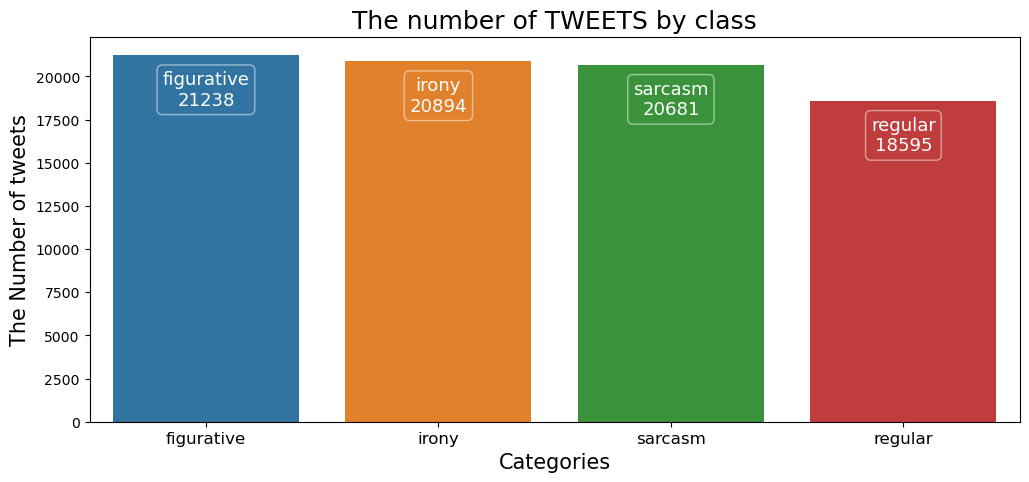

In [7]:
# Bar plot for each of the new category
category_count = df['class'].value_counts()

categories = category_count.index
df['class'].value_counts()
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of tweets', size= 15)

plt.xticks(size = 12)

plt.title("The number of TWEETS by class" , size = 18)

plt.show()

DUpLIcATE check 

In [8]:
# Check for duplicates wrt class and tweet
tweet_duplicates = df[df.duplicated()]
print("Duplicate Tweet count:",len(tweet_duplicates))
# Print the duplicate rows
print("Duplicate Tweet Rows:")
tweet_duplicates.to_excel('duplicate2.xlsx', index=False)

Duplicate Tweet count: 49
Duplicate Tweet Rows:


when checked with both tweet and class there are only 49

In [9]:
# Check for duplicates wrt class and tweet
tweet_duplicates = df[df.duplicated('tweets')]
print("Duplicate Tweet count:",len(tweet_duplicates))
# Print the duplicate rows
print("Duplicate Tweet Rows:")
tweet_duplicates.to_excel('duplicate2.xlsx', index=False)

Duplicate Tweet count: 13411
Duplicate Tweet Rows:


when checked with only tweets column there seem to be 13411 duplicates
couldnt identify why there are certain duplicates when i checked in excel with sorted tweet column
so now decided to lower case and also remove space and special characters for all tweets and then check for duplicates

In [10]:
# Preprocess the tweet text: lowercase and remove spaces and special characters
df['preprocessed_tweets'] = df['tweets'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x.lower()))

# Drop duplicates based on the preprocessed 'tweets' column
exact_duplicates = df[df.duplicated(subset=['preprocessed_tweets'], keep=False)]

# Save the exact duplicate tweets to an Excel file
exact_duplicates.to_excel('exact_duplicates.xlsx', index=False)

print("Exact Duplicate Tweet count:", len(exact_duplicates))
print("Exact Duplicate Tweet Rows:")
print(exact_duplicates['preprocessed_tweets'])

Exact Duplicate Tweet count: 26849
Exact Duplicate Tweet Rows:
0        beawaredirtysteptogetmoneystaylightstaywhitesa...
2        iminworkjeremymedsingledailymailreadersbeingse...
3               wilwwhydoigetthefeelingyoulikegamessarcasm
4        teacherarthurgrweingartenyouprobablyjustmissed...
5        tuneintonigezieandbetreatedtorachelplattensfig...
                               ...                        
80427              approachstickandgetinfectedfunnysarcasm
80432     onlynewlywedsandliarshavesexeverydayfunnysarcasm
80435    coraliealisonyeahletsgivewomenrightsbycensorin...
80463    demolishinghomestargetingparentsstealinglandwo...
80464    imatthelibraryandmyphonehasbeendeadforthemajor...
Name: preprocessed_tweets, Length: 26849, dtype: object


In [22]:


# Assuming you have already loaded the dataframe 'df'

# Preprocess the tweet text: lowercase and remove spaces and special characters
df['preprocessed_tweets'] = df['tweets'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x.lower()))

# Filter rows where class is 'regular', 'sarcasm', or 'irony'
filtered_df = df[df['class'].isin(['regular', 'sarcasm', 'irony'])]

# Drop duplicates based on the preprocessed 'tweets' column
filtered_df.drop_duplicates(subset=['preprocessed_tweets'], keep='first', inplace=True)

# Filter and include records with class 'figurative'
figurative_records = df[df['class'] == 'figurative']

# Concatenate filtered_df and figurative_records
final_df = pd.concat([filtered_df, figurative_records])

# Save the final DataFrame to an Excel file
final_df.to_excel('final_data.xlsx', index=False)

print("Final Data Count:", len(final_df))


C:\Users\HP\AppData\Local\Temp\ipykernel_17384\593854730.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop_duplicates(subset=['preprocessed_tweets'], keep='first', inplace=True)


Final Data Count: 81337


In [23]:


# Filter rows where class is 'regular', 'sarcasm', or 'figurative'
filtered_df1 = final_df[final_df['class'].isin(['irony', 'sarcasm', 'figurative'])]

# Find duplicates based on preprocessed text and class
duplicates = filtered_df1[filtered_df1.duplicated(subset=['preprocessed_tweets'], keep=False)]

# Identify duplicates with class 'regular' or 'sarcasm'
to_delete = duplicates[duplicates['class'].isin(['irony', 'sarcasm'])]

# Drop the identified duplicates from the original DataFrame
filtered_df1 = filtered_df1.drop(to_delete.index)


# Add records with 'regular' class back to the filtered DataFrame
regular_records = final_df[final_df['class'] == 'regular']
filtered_df1 = pd.concat([filtered_df1, regular_records])

# Save the filtered DataFrame to an Excel file
filtered_df1.to_excel('filtered_data.xlsx', index=False)

print("Filtered Data Count:", len(filtered_df1))


Filtered Data Count: 67964


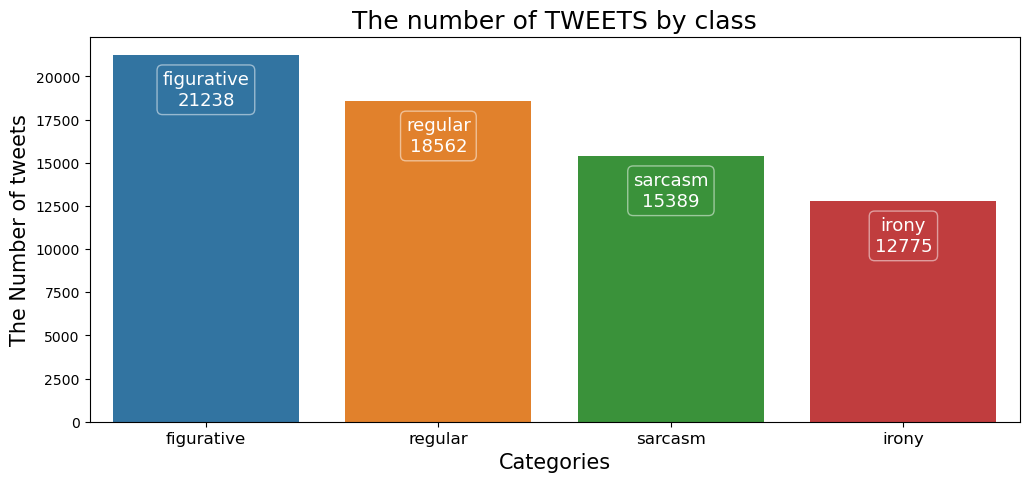

In [24]:
# Bar plot for each of the new category
category_count = filtered_df1['class'].value_counts()

categories = category_count.index
filtered_df1['class'].value_counts()
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of tweets', size= 15)

plt.xticks(size = 12)

plt.title("The number of TWEETS by class" , size = 18)

plt.show()

business decided to retain the figurative and delete the irony and sarcasm
after removing the duplicates - the dataset has highly unbanced classes

checked in excel' exact_duplicates-analysis' using sort - Once the spaces and special charachters were removed and the processed tweets were compared there were 26849 tweets 



Row Labels	Count of class
figurative	13381
irony	8125
regular	50
sarcasm	5293

Grand Total	26849

insights - for 13381 tweets - all those that are duplicates with class sarcasm have a copy marked  figurative 
            same is the case for all those that are duplicates with class irony are also marked sarcasm.

There are additioal -13418 when sarcasm and irony ROW COUNTS are added
so there are additional 37 duplicates either in sarcasm or irony or regular apart from figurative.

18 rows are showing only irony out of all 18 only 1 seems to be relevant irony statment
1 -some girls want to be treated like queens but they do not know how to be one. #irony which has 9 duplicate values out of the 18
2 -the other are #ironic,#irony,
3- mikloshvanegan: #russia #cartoon 4 #bilderberg #lobbyists:yet #wikileaks, #snowden fled 2..hmm, #irony #ows #tpp #… … without snowden, how …,
4-#russia #cartoon 4 #bilderberg #lobbyists:yet #wikileaks, #snowden fled 2..hmm, #irony #ows #tpp #gh2015 #tlv #ge2015 … without snowden, ho…

5 -#sarcasm with class sarcasm 4 duplciate values


which we can remove 

for the 50 regulars we can remove duplicates as same tweets have been reposted.

Actionable insights FOR-TOTAL- 13469
50 REGULARS - we will remove duplicates for regulars.
13382 - IN case where they are tagged as figurative or sarcasm and irony we will put them all under figurative and then remove           the duplicates.IE WE will keep the figurative class tweets.
37-  IRONY OR SARCASM WE CAN REMOVE THE DUPLICATES

In [15]:
import pandas as pd
import re

# Assuming you have a DataFrame called df

# Preprocess the 'tweets' column: lowercase and remove spaces and special characters
df['preprocessed_tweets'] = df['tweets'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x.lower()))

# Remove duplicates based on condition: class is 'regular' and preprocessed tweets are duplicated
# non_duplicate_regular = df[df['class'] == 'regular'].drop_duplicates(subset=['preprocessed_tweets'], keep=False)
# Drop duplicates where class is 'regular', 'sarcasm', or 'irony'
classes_to_check = ['regular', 'sarcasm', 'irony']
non_duplicate_rows = df[~df['class'].isin(classes_to_check) | 
                        (~df['class'].duplicated(keep=False) & df['class'].isin(classes_to_check))]

# Save the non-duplicate regular class DataFrame without duplicates to a new Excel file
non_duplicate_regular_file_path = 'non_duplicate_regular.xlsx'
non_duplicate_regular.to_excel(non_duplicate_regular_file_path, index=False)

print("Non-duplicate regular class DataFrame saved to:", non_duplicate_regular_file_path)

# Remove 'regular' class rows from the original DataFrame
df = df[df['class'] != 'regular']

# Append the remaining non-duplicate regular class rows back to the original DataFrame
df = df.append(non_duplicate_regular)

# Save the modified DataFrame to a new Excel file
filtered_file_path = 'filtered_no_duplicates.xlsx'
df.to_excel(filtered_file_path, index=False)

print("Filtered DataFrame without duplicates saved to:", filtered_file_path)
df.shape

Non-duplicate regular class DataFrame saved to: non_duplicate_regular.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_23888\4209901806.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(non_duplicate_regular)


Filtered DataFrame without duplicates saved to: filtered_no_duplicates.xlsx


(81358, 3)

In [ ]:
# check how many records are remaining.



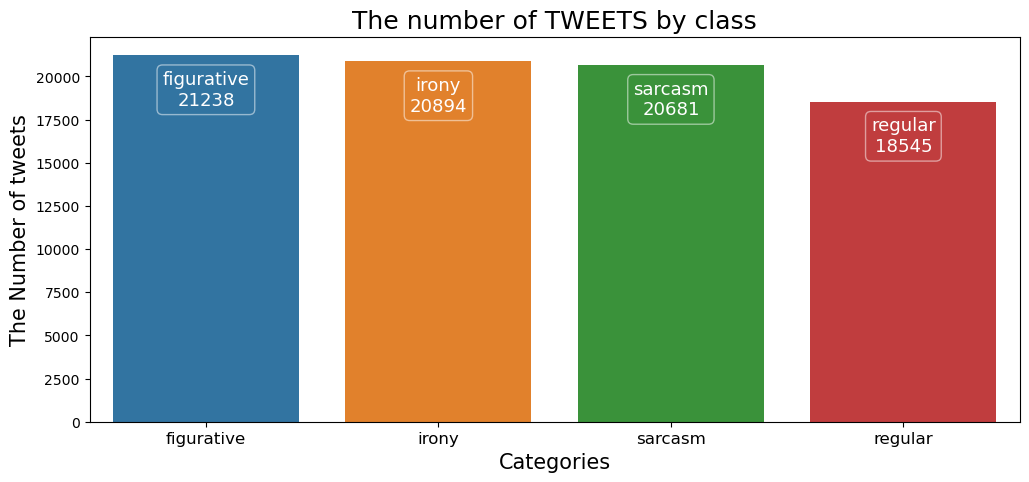

In [16]:
# Bar plot for each of the new category
category_count = df['class'].value_counts()

categories = category_count.index
df['class'].value_counts()
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of tweets', size= 15)

plt.xticks(size = 12)

plt.title("The number of TWEETS by class" , size = 18)

plt.show()

Topic Modeling:

Use techniques like Latent Dirichlet Allocation (LDA) to identify underlying topics within the tweets.
Explore how different topics relate to sentiment and engagement.

Word Frequency Analysis:

Create word clouds to visualize frequently used words in positive, negative, and neutral tweets.

Identify keywords associated with different sentiment categories.
Sentiment Analysis:Calculate sentiment scores for each tweet using tools like VADER, TextBlob, or custom models.
Group tweets into positive, negative, and neutral sentiment categories.
Analyze the distribution of sentiments over time to identify trends.

Trend Analysis:

Identify hashtags and mentions to understand popular topics and users.
Plot the frequency of specific hashtags or mentions to visualize trends.
Analyze how certain events or topics correlate with changes in sentiment.

In [ ]:
df.head()

playing with data

In [ ]:
# Tokenization
df['tokenized_tweets'] = df['tweets'].apply(word_tokenize)

# Basic Analysis
df['word_count'] = df['tokenized_tweets'].apply(len)

# Calculate basic statistics
avg_word_count = df['word_count'].mean()
max_word_count = df['word_count'].max()
min_word_count = df['word_count'].min()
stddev = df['word_count'].std()

print("Average Word Count:", avg_word_count)
print("Max Word Count:", max_word_count)
print("Min Word Count:", min_word_count)
print("Std dev:", stddev)
df.head()


In [13]:

# Distribution of word counts
word_count_distribution = df['word_count'].value_counts().sort_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with a single subplot
plt.figure(figsize=(10, 6))

# Define a color palette for gradient coloring
cmap = sns.color_palette("RdYlBu", n_colors=len(word_count_distribution))

# Bar Plot with Gradient Colored Bars
sns.barplot(ax=plt.gca(), x=word_count_distribution.index, y=word_count_distribution.values, palette=cmap)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution - Bar Plot')


plt.tight_layout()
plt.show()


KeyError: 'word_count'

INSIGHTS:THIS shows that a approximately normal distribution of word counts for our tweets data. thus this data follows the Empirical rule.
68% tweets(data) lies within the first std deviation.hence most of the data lies between 15 to 26 counts
Average Word Count: 20.903252751572328
Max Word Count: 73
Min Word Count: 2
Std dev: 6.530869292910582
highest frequency of tweets can be seen with the words count of 22 to 28 words this shows that most users prefer to write 22 to 28 words.


In [ ]:
from wordcloud import WordCloud
from collections import Counter



# Combine all tokenized tweets into a single list of words
all_words = [word for sublist in df['tokenized_tweets'] for word in sublist]

# Calculate the total number of unique words
total_unique_words = len(set(all_words))
print("Total unique Words:", total_unique_words)

# Create a DataFrame with word frequencies
word_freq = Counter(all_words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Show only the top 4000 frequent words
top_words = word_freq_df.head(10000)

print("Top 4000 Word Frequencies DataFrame:")
print(top_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Top 4000 Most Frequent Words in Tokenized Tweets')
plt.show()


In [ ]:
from collections import Counter

# Assuming you have already loaded your DataFrame df and performed tokenization

# Combine all tokenized tweets into a single list of words
all_words = [word for sublist in df['tokenized_tweets'] for word in sublist]

# Calculate word frequencies
word_freq = Counter(all_words)

# Filter words with frequencies greater than 5000
popular_words = {word: freq for word, freq in word_freq.items() if freq > 1}

# Calculate the total number of popular words
total_popular_words = len(popular_words)
print("words in the descending order of popularity :", total_popular_words)
print('-------------------------------------------')
## Sort the popular_words dictionary based on frequencies in descending order
sorted_popular_words = dict(sorted(popular_words.items(), key=lambda item: item[1], reverse=True))

# Path to the output text file
output_file_path = 'popular_words_output.txt'

# Open the file for writing with UTF-8 encoding
with open(output_file_path, 'w', encoding='utf-8') as f:
    # Display and write words with frequencies greater than 1 in descending order
    for word, freq in sorted_popular_words.items():
        output_line = f"Word: {word}, Frequency: {freq}\n"
        print(output_line, end='')  # Print to console
        f.write(output_line)  # Write to file

        
print("Output has been saved to:", output_file_path)


Insights: Most common words used puntuations /url FOR FURTHER PROCESSING
Actionable insights -TO CREATE CUSTOM STOPWORD DICTIONARY BE REMOVED 
Word: #, Frequency: 179368
Word: :, Frequency: 43793
Word: ., Frequency: 42272
Word: @, Frequency: 41816
Word: the, Frequency: 29956
Word: http, Frequency: 25599
Word: ,, Frequency: 21081
Word: !, Frequency: 18736
Word: ?, Frequency: 12756
Word: ..., Frequency: 7996
Word: '', Frequency: 5912
Word: ``, Frequency: 5834
Word: ;, Frequency: 5047
Word: &, Frequency: 4235
Word: -, Frequency: 3604
Word: ), Frequency: 2822
Word: (, Frequency: 1928
Word: .., Frequency: 1824
Word: ...., Frequency: 1156
Word: *, Frequency: 1018
Word: $, Frequency: 826
d: …, Frequency: 692
Word: |, Frequency: 558

1]Word: Sarcasm, Frequency: 4297 this #Sarcasm might meddle with our label predictions since most of them are tagged to statments that have figurative labels.

2] there are 2 types of hash tags used one is as labelling the statment and one is used as an name entity hence we will target the hash tags at the end of the tweets only.
eg. 'Aamir calls #BajrangiBhaijaan as Salman's best movie yet! You decide whether it's #sarcasm or a compliment!' - Name entity recognition.
Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @â€¦ https://t.co/Oj6BdyX3WG
!


ABBREVIATIONS USED-
$$$s ,$ IS AN abbr for 'Dollar'  
&amp; - is used as an abbreviation for 'and'


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import re


# List of words to remove
words_to_remove = ['#','.', '@', 'the', ',', '!', '?', '...', "''", "``", ';', '&', '-', ')', '(', '..', '....', '*', 'd:', '…', '|']

# Combine custom words to remove with NLTK's stopwords
custom_stopwords = set(words_to_remove)

# Tokenization and preprocessing
df['tokenized_tweets'] = df['tweets'].apply(word_tokenize)

# Define a regular expression pattern to match URLs
url_pattern = r'https?://\S+'

# Remove URLs from tokenized tweets using regex
df['preprocessed_tweets'] = df['tokenized_tweets'].apply(lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords and not re.match(url_pattern, word)])

# Print preprocessed tweets
print("Preprocessed Tweets:")
print(df['preprocessed_tweets'])

# Save preprocessed tweets to Excel file
output_file = 'preprocessed_tweets.xlsx'
df.to_excel(output_file, index=False)

print("Preprocessed tweets saved to", output_file)

df.head()

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame df and preprocessed the tweets

# Combine preprocessed words from all tweets into a single list
all_words = [word for sublist in df['preprocessed_tweets'] for word in sublist]

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in Preprocessed Tweets')
plt.show()


Parsing Text Using Regular
**Expressions**  “re” library in Python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter

# Assuming you have already loaded your DataFrame df and performed tokenization

# Combine all tokenized tweets into a single list of words
all_words = [word for sublist in df['tokenized_tweets'] for word in sublist]

# Calculate the total number of unique words
total_unique_words = len(set(all_words))
print("Total Unique Words:", total_unique_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in Tokenized Tweets without custom stop words')
plt.show()


here we have used the wordcloud with the custom stopwords that it removes internally but here we can see that a t and co is showing up in the most used words which is not seen in the data so it can be hazardous to blindly use readily available or inbuilt stop words dictionaries for our data.

Text Pre-Processing
1. Lowercasing
2. Punctuation removal
3. Stop words removal
4. Text standardization - replace slang words with formal text,example b4 → before, chk → check e ,abbrevations etc
5. Spelling correction
6. Tokenization
7. Stemming/Lemmatization ( will be using lemmatization)
8. Exploratory data analysis
9. Explore Semantic relationships
10.


In [ ]:
# Define a regular expression pattern
pattern = r'#\w+'  # This pattern matches hashtags like #happy

# Function to apply regular expression and extract matches
def extract_hashtags(text):
    hashtags = re.findall(pattern, text)
    return hashtags

# Apply the function to the 'tweets' column
df['hashtags'] = df['tweets'].apply(extract_hashtags)
df.head()

strategy for abbrevation - identify the most used abbrevations through word cloud and then creawte the dictionary accordingly.
Dealing with abbreviations in text data can be a bit challenging, as abbreviations can have various meanings depending on the context. However, we can approach this issue by creating a custom dictionary that maps abbreviations to their full forms and then replacing them in the text.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Define a regular expression pattern to match URLs
url_pattern = r'https?://\S+'  # This pattern matches URLs starting with http:// or https://

# Initialize the spell checker
spell = SpellChecker()
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
# Function to standardize text
# Function to remove URLs, punctuation, stopwords, and convert text to lowercase
# Function to correct spelling and standardize text
# Function to standardize text with tokenization and lemmatization

def standardize_text(text):
    # Remove URLs using regular expression
    clean_text = re.sub(url_pattern, '', text)
    # Remove punctuation using string.punctuation
    clean_text = clean_text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    lowercase_text = clean_text.lower()
    # Remove accents using unidecode
    standardized_text = unidecode(lowercase_text)

    # Tokenize the text
    words = word_tokenize(standardized_text)

    # Lemmatize using WordNet Lemmatizer
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Correct spelling using pyspellchecker
    corrected_words = [spell.correction(word) for word in lemmatized_words]

    # Filter out None values (words that couldn't be corrected)
    corrected_words = [word for word in corrected_words if word is not None]

    # Remove stopwords using NLTK
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in corrected_words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function using tqdm to track progress
tqdm.pandas()
df['clean_tweets'] = df['tweets'].progress_apply(standardize_text)

# Display the updated DataFrame
df.head()


In [ ]:
# Identify and remove duplicates based on cleaned text
unique_data = df.drop_duplicates(subset='clean_tweets', keep='first')

Exploratory data analysis

In [ ]:
from wordcloud import WordCloud


# Combine all cleaned tweets into a single text
all_tweets_text = ' '.join(df['clean_tweets'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Tweets")
plt.show()


In [ ]:
import seaborn  as sns

# Word frequency analysis
word_frequency = pd.Series(' '.join(df['clean_tweets']).split()).value_counts()[:50]

# Create a figure for the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=word_frequency.values, y=word_frequency.index, palette="viridis")
plt.title("Top 50 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()



In [ ]:
# Word frequency analysis
word_frequency = pd.Series(' '.join(df['clean_tweets']).split()).value_counts()[:50]

# Create a DataFrame
word_freq_df = pd.DataFrame({'Word': word_frequency.index, 'Frequency': word_frequency.values})

# Display the DataFrame
print(word_freq_df)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the NLTK Vader SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:

sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using Vader SentimentIntensityAnalyzer
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    if sentiment_scores['compound'] > 0.05:
        return 'positive'
    elif sentiment_scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis function to the 'tweets' column
df['sentiment'] = df['tweets'].apply(analyze_sentiment)



In [ ]:
df.head()

Sentiment Distribution Plot:
Visualize the distribution of sentiments (positive, negative, neutral) using a bar plot.

In [ ]:
# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Add a subplot
ax = fig.add_subplot(111)

# Create a bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2", ax=ax)

# Annotate the values on top of the bars
for a, p in enumerate(ax.patches):
    ax.annotate(format(p.get_height(), '.0f'), xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                xytext=(0, -25), size=13, color='white', ha='center', va='center', textcoords='offset points',
                bbox=dict(boxstyle='round', facecolor='none', edgecolor='white', alpha=0.5))

plt.title("Sentiment Distribution", size=18)
plt.xlabel("Sentiment", size=15)
plt.ylabel("Count", size=15)
plt.xticks(size=12)
plt.show()


In [ ]:
# Pie Chart for Sentiment Proportions:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Sentiment Proportions")
plt.show()


Sentiment by Category:

In [ ]:
# Group by class and sentiment to analyze sentiment within classes
sentiment_by_class = df.groupby(['class', 'sentiment']).size().unstack(fill_value=0)

# Plot sentiment by class for each sentiment
sentiments = ['positive', 'neutral', 'negative']
for sentiment in sentiments:
    plt.figure(figsize=(8, 6))
    ax = sentiment_by_class[sentiment].plot(kind='bar', color=sns.color_palette("Set2"), label=sentiment)
    plt.title(f"Sentiment Frequency by Class - {sentiment.capitalize()} Sentiment")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.legend(title="Sentiment")

    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()


In [ ]:
# emoji analysis

<h2>N-gram Analysis - excluding stop words</h2>
<p>Analyze the frequency of word combinations (n-grams) to identify common phrases or patterns in the text. N-grams can help capture more context than individual words.</p>

<img src="ngram_analysis.png" alt="N-gram Analysis">


In [ ]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter


# Specify the value of n for n-grams (e.g., 2 for bigrams, 3 for trigrams, etc.)
n = 2

# Tokenize the text in the 'clean_tweets' column and generate n-grams
df['tokenized_tweets'] = df['clean_tweets'].apply(word_tokenize)
df['ngram_list'] = df['tokenized_tweets'].apply(lambda tokens: list(ngrams(tokens, n)))

# Count the frequency of n-grams
df['ngram_freq'] = df['ngram_list'].apply(Counter)

df.head()

Questions for mam 
since we have hash tags which says sarcasm etc in the tweets but those are actually figurative category hence decided to seperate the hash tags and the statments.